# How to Decompose Time Series Data

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

## Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

- **Systematic**: Components of the time series that have consistency or recurrence and can be described and modeled.
- **Non-Systematic**: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- **Level**: The average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.he series.
g.

In [1]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from scipy.fft import fft, fftfreq

## Airline Passengers Dataset

The Airline Passengers dataset describes the total number of airline passengers over a period of time.

The units are a count of the number of airline passengers in thousands. There are 144 monthly observations from 1949 to 1960.

In [4]:
# You can load a local file in 'data' subdirectory or get it directly from on-line:
#data= pd.read_csv('./data/airline-passengers.csv', header=0, index_col=0) 
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", header=0, index_col=0)
#data

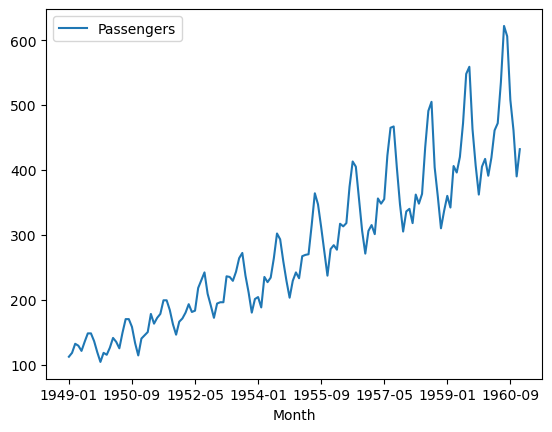

In [6]:
# Option A: very quick but simple plot
data.plot()
plt.show()

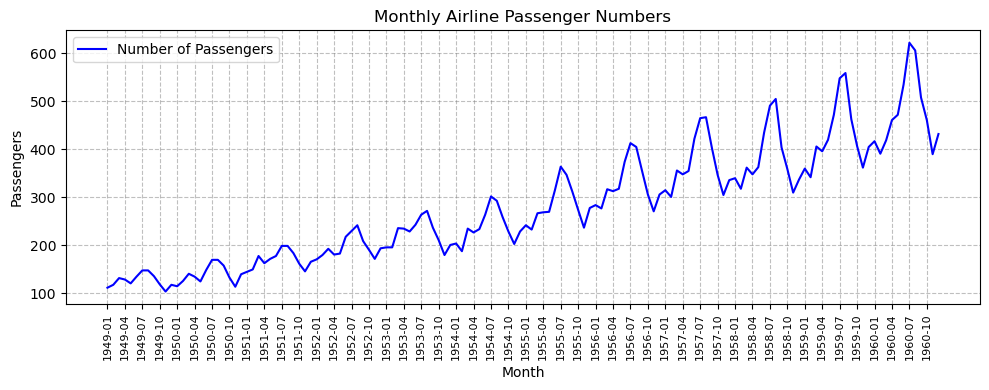

In [8]:
# Option B: a customized plot
plt.figure(figsize=(10, 4))     # control the size of the figure (width, height)
plt.plot(data, color='blue', label='Number of Passengers')

plt.title('Monthly Airline Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Passengers')

plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.legend()

# Rotate x-axis labels and reduce their frequency
plt.xticks(ticks=range(0, len(data), 3), labels=data.index[::3], 
           rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

In [10]:
# Convert the index to datetime and set the frequency to monthly
data.index = pd.to_datetime(data.index, format='%Y-%m')
data = data.asfreq('MS')  # MS stands for Month Start
data

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

### Classical Decomposition (Additive and Multiplicative)
We'll start with the standard methods: additive and multiplicative decomposition.

An **additive model** suggests that the components are added together as follows:
$$
y(t) = Level + Trend + Seasonality + Noise
$$

- An additive model is linear where changes over time are consistently made by the same amount.
- A linear trend is a straight line.
- A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

A **multiplicative model** suggests that the components are multiplied together as follows:
$$
y(t) = Level * Trend * Seasonality * Noise
$$

- A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.
- A nonlinear trend is a curved line.
- A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

In [13]:
#result = seasonal_decompose(data, model='multiplicative', period = 12)
result = seasonal_decompose(data, model='additive', period = 12)

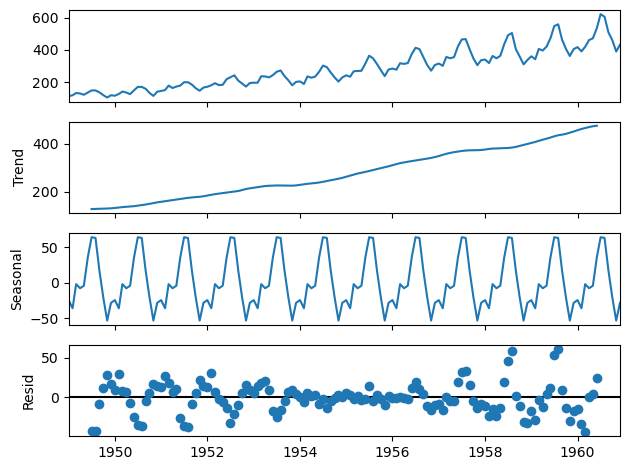

In [15]:
result.plot()
plt.show()

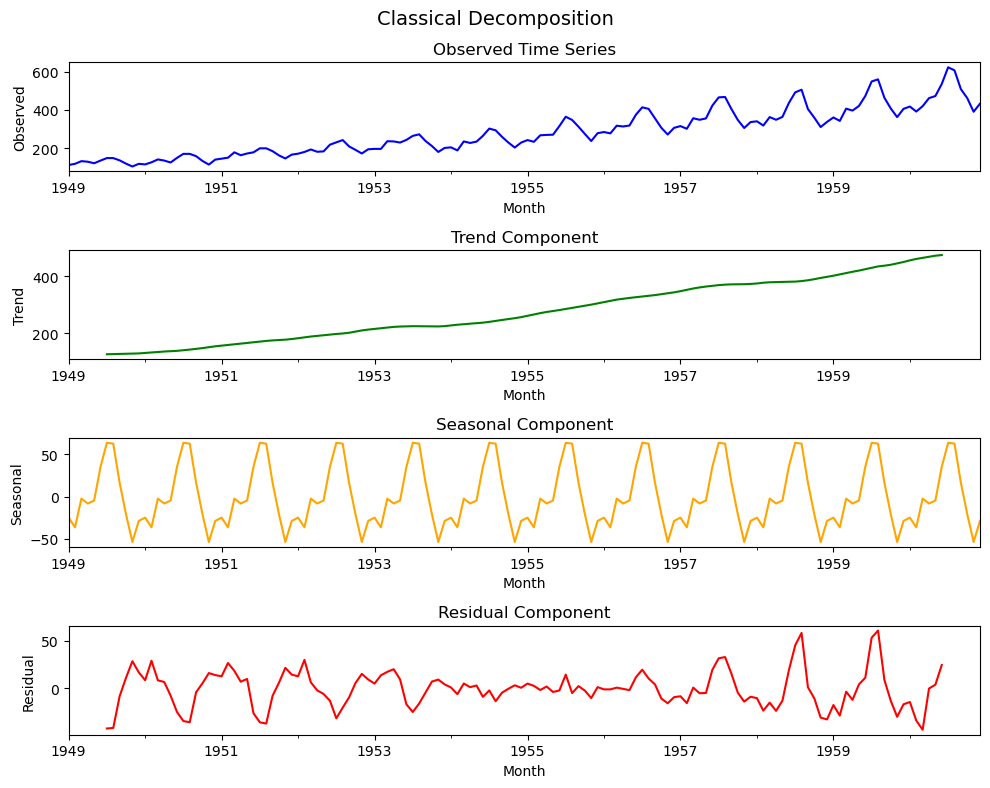

In [17]:
# Plot the decomposition with improved formatting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
plt.suptitle('Classical Decomposition', fontsize=14)

# Observed
result.observed.plot(ax=ax1, color='blue')
ax1.set_ylabel('Observed')
ax1.set_title('Observed Time Series')

# Trend
result.trend.plot(ax=ax2, color='green')
ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')

# Seasonal
result.seasonal.plot(ax=ax3, color='orange')
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal Component')

# Residual
result.resid.plot(ax=ax4, color='red')
ax4.set_ylabel('Residual')
ax4.set_title('Residual Component')

# Adjust layout for readability
plt.tight_layout()

plt.show()

### STL Decomposition (Seasonal and Trend using LOESS)
STL decomposition is more flexible and robust than the classical method. It decomposes the time series into trend, seasonal, and residual components using locally weighted regression (LOESS).

STL has several advantages:

- Handle any type of seasonality, not only monthly and quarterly data
- The seasonal component is allowed to change over time, and the rate of change can be controlled by the user
- The smoothness of the trend-cycle can also be controlled by the user
- It can be robust to outliers (occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components but can affect the remainder component)

The key inputs into STL function are:

- `seasonal` - The length of the seasonal smoother. Must be odd.
- `trend` - The length of the trend smoother, usually around 150% of season. Must be odd and larger than season.
- `low_pass` - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.
- `robust` - Flag (True/False) indicating whether to use a weighted version that is robust to some forms of outliers.

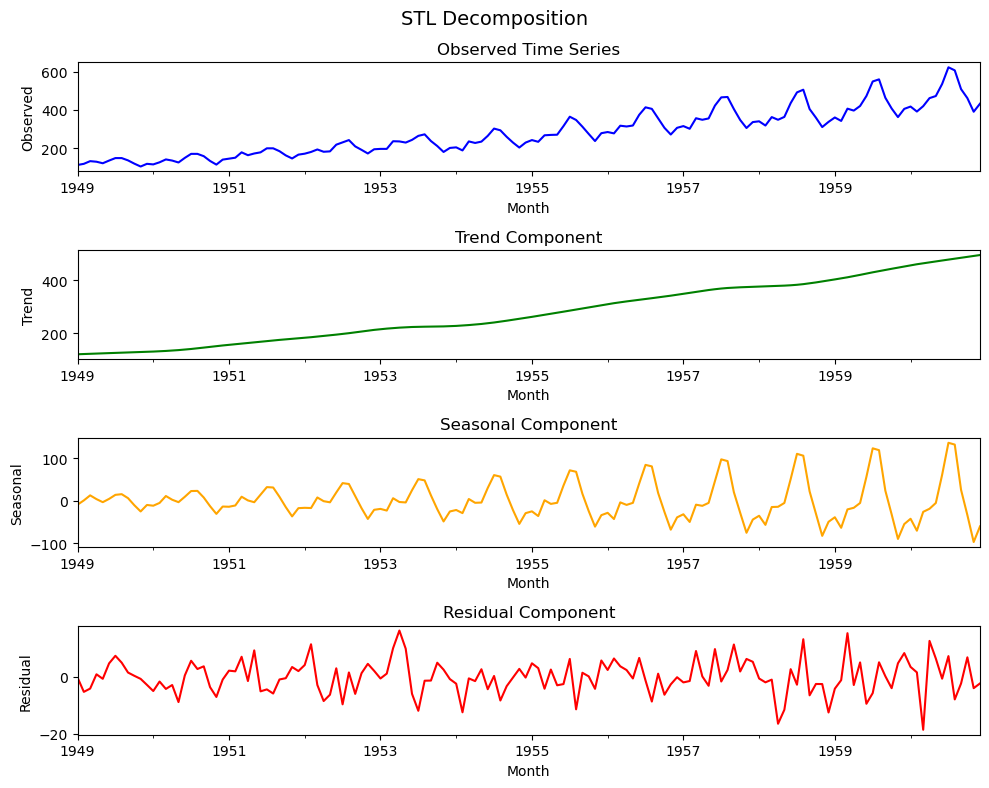

In [20]:
# STL decomposition
stl = STL(data['Passengers'], seasonal=13)  # Adjust the seasonal parameter for smoother trend/seasonal components
result = stl.fit()

# Plot STL decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
plt.suptitle('STL Decomposition', fontsize=14)

# Observed
result.observed.plot(ax=ax1, color='blue')
ax1.set_ylabel('Observed')
ax1.set_title('Observed Time Series')

# Trend
result.trend.plot(ax=ax2, color='green')
ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')

# Seasonal
result.seasonal.plot(ax=ax3, color='orange')
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal Component')

# Residual
result.resid.plot(ax=ax4, color='red')
ax4.set_ylabel('Residual')
ax4.set_title('Residual Component')

# Adjust layout for readability
plt.tight_layout()
plt.show()

Try **plotly** plot for more interactive display:

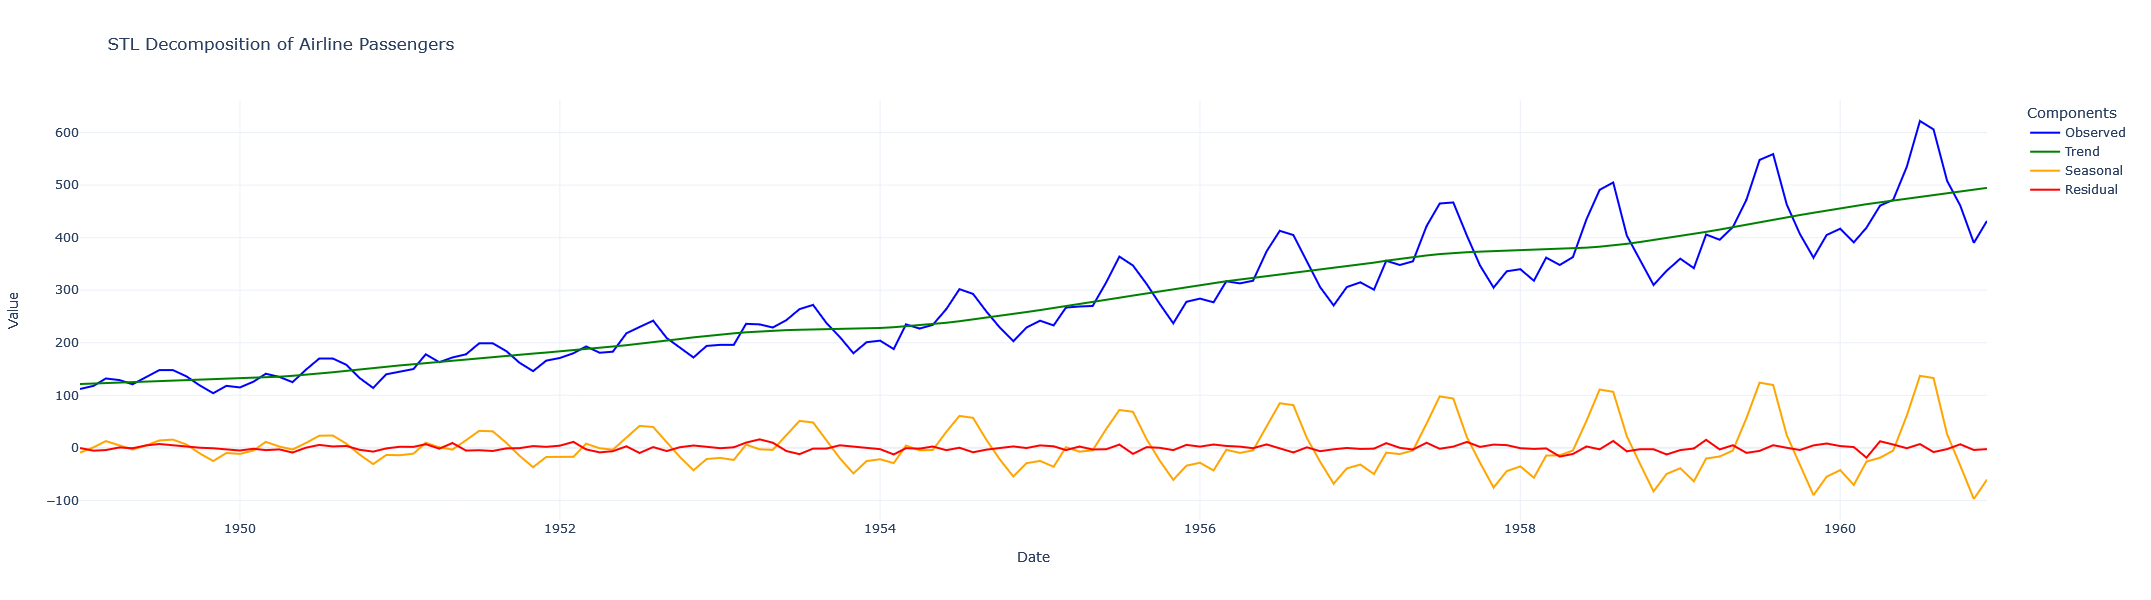

In [23]:
# Create subplots for the decomposition components
fig = go.Figure()
# Observed
fig.add_trace(go.Scatter(x=data.index, y=result.observed, name='Observed', line=dict(color='blue')))
# Trend
fig.add_trace(go.Scatter(x=data.index, y=result.trend, name='Trend', line=dict(color='green')))
# Seasonal
fig.add_trace(go.Scatter(x=data.index, y=result.seasonal, name='Seasonal', line=dict(color='orange')))
# Residual
fig.add_trace(go.Scatter(x=data.index, y=result.resid, name='Residual', line=dict(color='red')))
# Layout
fig.update_layout(
    title='STL Decomposition of Airline Passengers',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    width=1200,
    height=600,
    legend_title="Components"
)
# Show plot
fig.show()

### Moving Average and Differencing for Trend and Seasonality Detection

In addition to decomposition methods, detecting trends and seasonality through moving averages and differencing can be useful.

#### Moving Average for Trend Detection

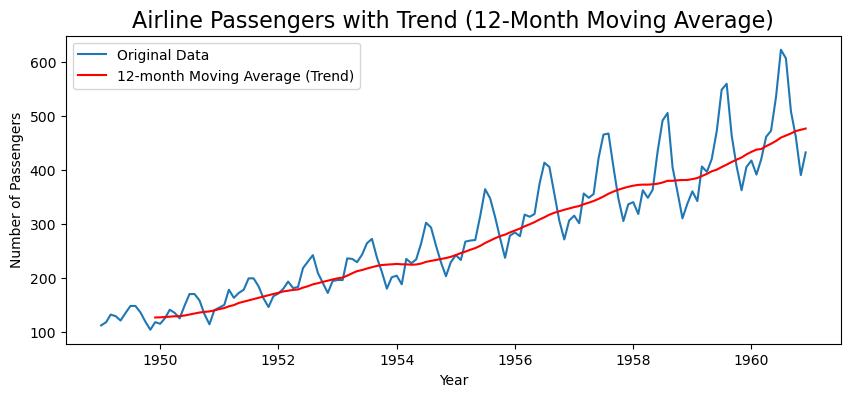

In [27]:
# Calculate a rolling mean to identify the trend
data['Trend'] = data['Passengers'].rolling(window=12).mean()

# Plot the original time series and the rolling mean
plt.figure(figsize=(10, 4))
plt.plot(data['Passengers'], label='Original Data')
plt.plot(data['Trend'], label='12-month Moving Average (Trend)', color='red')
plt.title('Airline Passengers with Trend (12-Month Moving Average)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


#### Differencing for Seasonality Detection

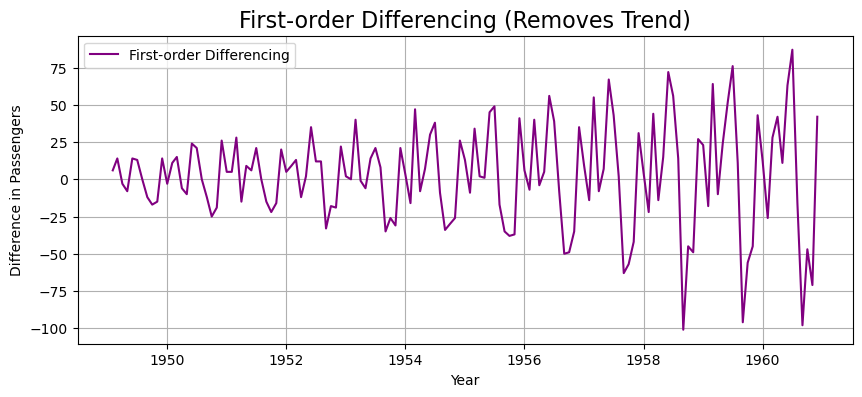

In [30]:
# Perform first-order differencing to remove trend and observe seasonality
data['First Difference'] = data['Passengers'].diff()

# Plot the first-order differencing
plt.figure(figsize=(10, 4))
plt.plot(data['First Difference'], label='First-order Differencing', color='purple')
plt.title('First-order Differencing (Removes Trend)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Difference in Passengers')
plt.grid(True)
plt.legend()
plt.show()


### Fourier Transform-Based Decomposition for Time Series Analysis

The **Fourier Transform (FT)** is a powerful mathematical tool used to decompose a time series into its constituent sinusoidal components. This technique is particularly helpful for analyzing **periodic** or **cyclical** patterns in time series data. In time series analysis, FT helps to uncover hidden frequencies (seasonal or cyclical patterns) that might not be immediately visible in the time domain.

Fourier Transform is not directly used to analyze the level or long-term trend. These components are better analyzed using other methods like moving averages or classical decompositions. 

The Fourier Transform converts a time-domain signal (your time series data) into the frequency domain, representing the data as a sum of sine and cosine functions. Essentially, it shows how much of each frequency (or periodic component) is present in your time series. In simpler terms, Fourier Transform allows you to represent your time series as a combination of waves of different frequencies and amplitudes.

- **Time domain**: This is the normal representation of your data, where the x-axis is time, and the y-axis is the value (e.g., number of passengers).
- **Frequency domain**: This representation shows how different periodic patterns (e.g., yearly, quarterly, monthly) contribute to your time series.

**Seasonality**: Fourier Transform is excellent for identifying periodic patterns in the data. For example, if your time series has a yearly cycle, Fourier Transform will reveal a peak at the corresponding frequency (related to 12 months).

**Cyclical Components**: Cyclical components refer to repeating patterns in the data that are not as regular as seasonal patterns. Fourier Transform can also detect these components if they have specific frequencies. You might find lower-frequency cycles that represent business or economic cycles.

#### Interpret the Frequency Spectrum
After applying the Fourier Transform, you'll get a frequency spectrum, where:

- The x-axis represents the frequencies present in your data.
- The y-axis represents the amplitude (strength) of each frequency.
- High peaks in the spectrum indicate that a certain frequency contributes strongly to your time series. In the airline passengers data, you will likely see a strong peak corresponding to an annual cycle (since the data shows seasonal patterns over 12 months).

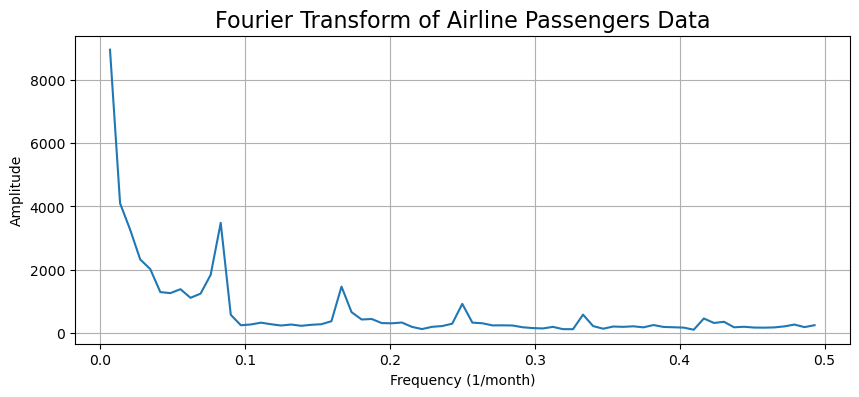

In [33]:
# Remove NaN values from the data
data_clean = data[['Passengers']].copy() 

# Perform Fourier Transform
fourier = fft(data_clean['Passengers'])
frequencies = fftfreq(len(data_clean), d=1)  # Assuming monthly data (d=1 month)

# Only positive frequencies (Fourier Transform is symmetric)
mask = frequencies > 0
plt.figure(figsize=(10, 4))
plt.plot(frequencies[mask], np.abs(fourier)[mask], label='Amplitude of Frequencies')
plt.title('Fourier Transform of Airline Passengers Data', fontsize=16)
plt.xlabel('Frequency (1/month)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

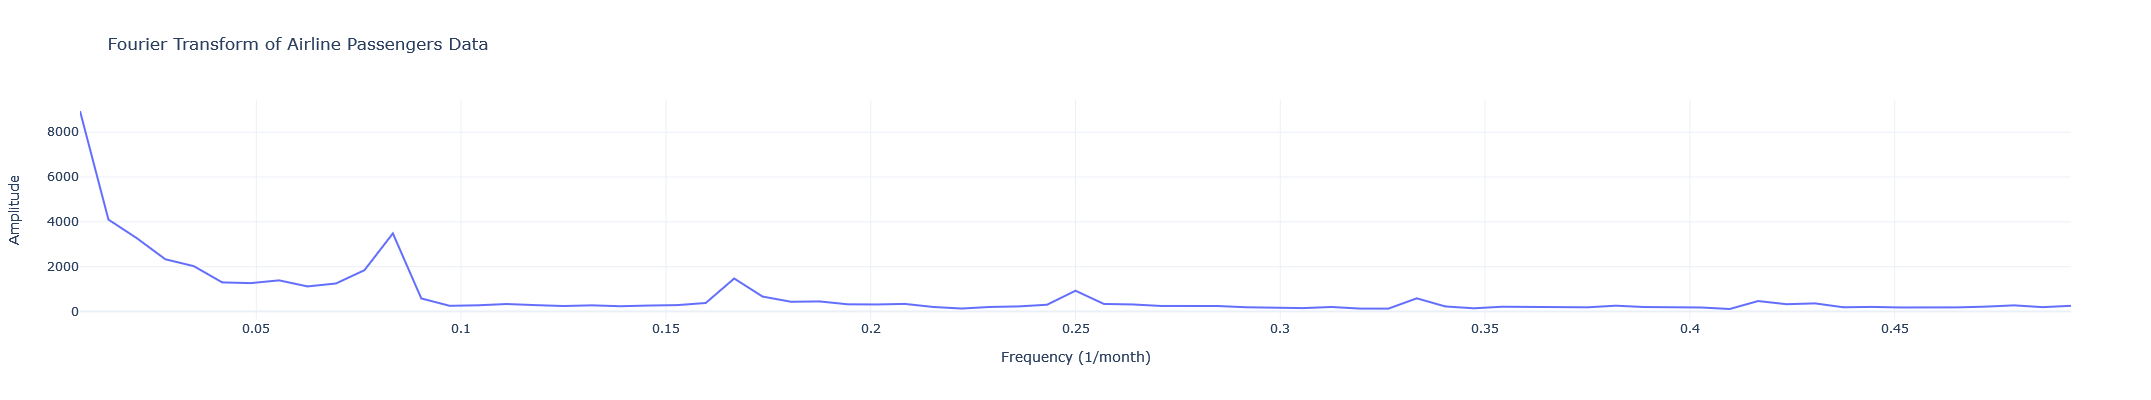

In [35]:
# Only positive frequencies (Fourier Transform is symmetric)
mask = frequencies > 0

# Create the Plotly figure
fig = go.Figure()

# Add trace for Fourier amplitude vs frequency
fig.add_trace(go.Scatter(x=frequencies[mask], y=np.abs(fourier)[mask], mode='lines', name='Amplitude of Frequencies'))

# Customize the layout
fig.update_layout(
    title='Fourier Transform of Airline Passengers Data',
    xaxis_title='Frequency (1/month)',
    yaxis_title='Amplitude',
    template='plotly_white',
    width=800,
    height=400
)

# Show the plot
fig.show()

**Tip**: Find the $x$-value of the peak and calculate 1/value. For example, 
- the first peak is 0.083333 which is 1/12, so every 12 periods there is a repetitive pattern.
- the second peak is at 0.16666 which is 1/6, so every 6 periods there is another repetitive pattern.
- the third peak is at 0.25 exactly, which is 1/4, so every 4 period there is yet another (although much smaller) repetitive pattern.

#### Filter Cyclical Components
You can isolate certain components (like cycles and seasonality) by filtering out specific frequency ranges. For example, low frequencies represent longer cycles, while high frequencies represent short-term seasonality.

Here's an example of how to filter out lower frequencies to remove long-term cycles or trends:

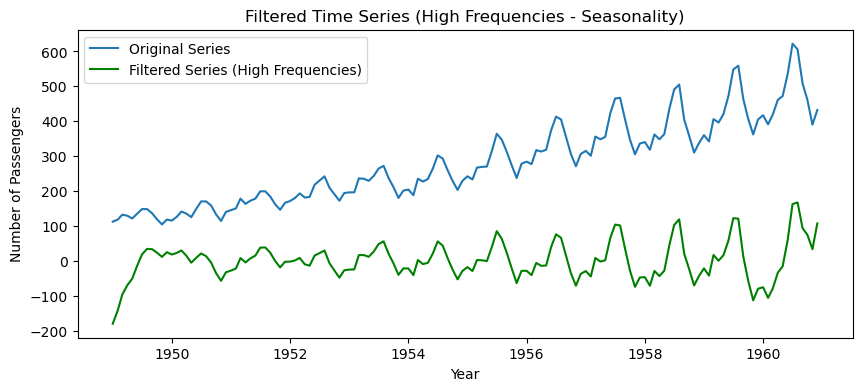

In [39]:
# Filter out low frequencies (high amplitude)
filtered_fourier = np.copy(fourier)
filtered_fourier[np.abs(frequencies) <= 1/24] = 0  # Keeping only higher frequencies (try 1/12, 1/24, and 1/6)

# Perform inverse Fourier Transform to return to the time domain
filtered_series = np.real(np.fft.ifft(filtered_fourier))

# Plot original and filtered series
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Passengers'], label='Original Series')
plt.plot(data.index, filtered_series, label='Filtered Series (High Frequencies)', color='green')
plt.title('Filtered Time Series (High Frequencies - Seasonality)', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### Autocorrelation and Partial Autocorrelation for Seasonality Detection

Autocorrelation and partial autocorrelation plots (ACF and PACF) are useful for detecting seasonality and lags in the data.

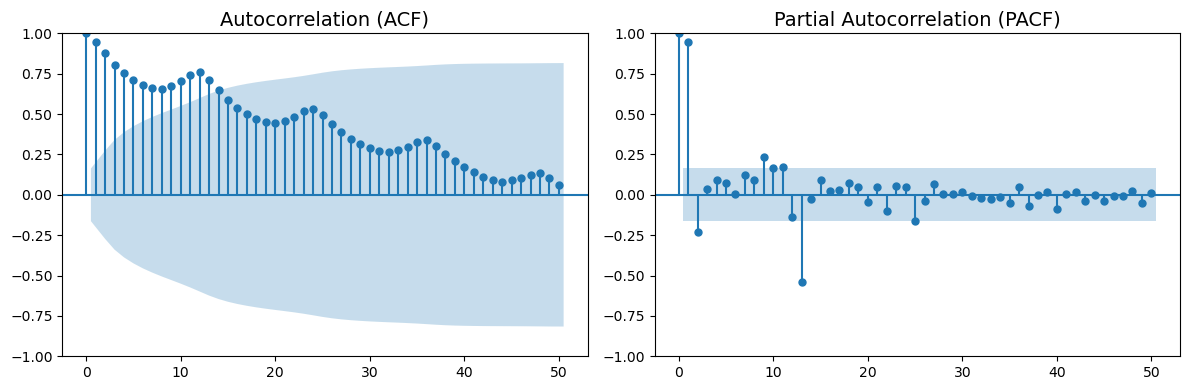

In [42]:
# Plot ACF and PACF to observe lags and seasonality
plt.figure(figsize=(12, 4))

# ACF (Autocorrelation Function)
plt.subplot(121)
plot_acf(data_clean['Passengers'], ax=plt.gca(), lags=50)
plt.title('Autocorrelation (ACF)', fontsize=14)

# PACF (Partial Autocorrelation Function)
plt.subplot(122)
plot_pacf(data_clean['Passengers'], ax=plt.gca(), lags=50)
plt.title('Partial Autocorrelation (PACF)', fontsize=14)

plt.tight_layout()
plt.show()


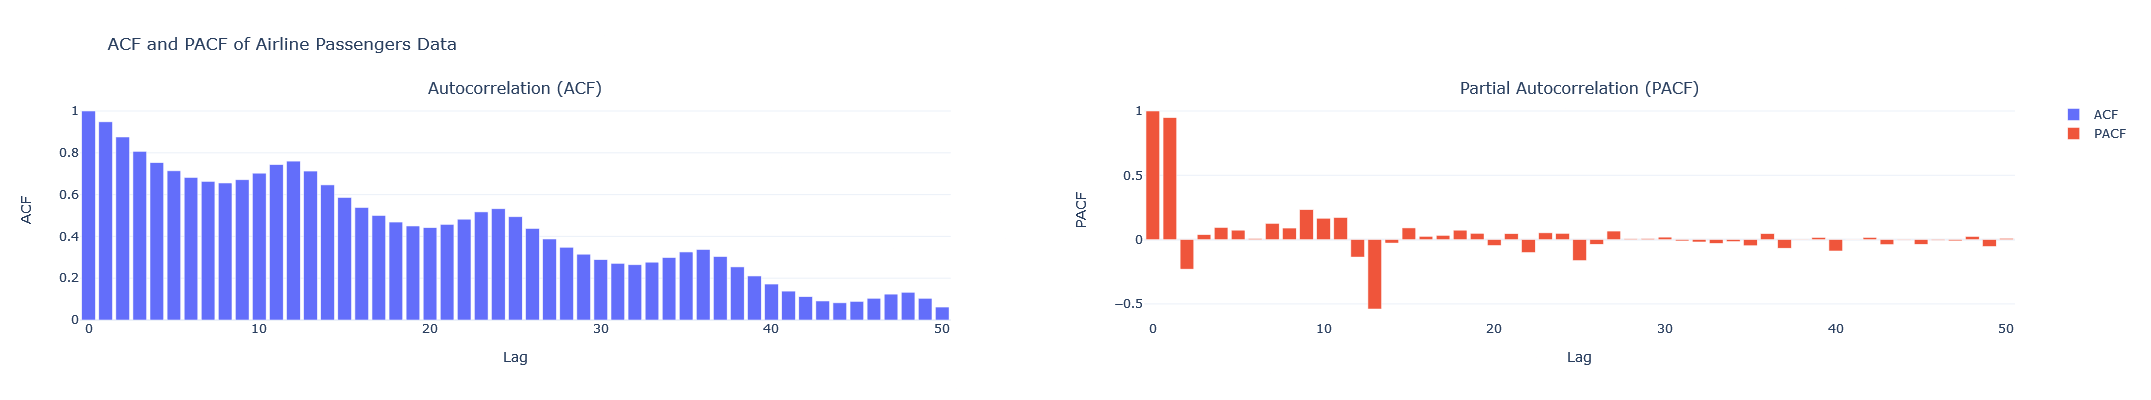

In [44]:
# Compute ACF and PACF
acf_vals = acf(data_clean, nlags=50)
pacf_vals = pacf(data_clean, nlags=50, method="ywm")

# Create a subplot for ACF and PACF using Plotly
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Autocorrelation (ACF)', 'Partial Autocorrelation (PACF)'))

# ACF plot
fig.add_trace(go.Bar(x=list(range(len(acf_vals))), y=acf_vals, name='ACF'), row=1, col=1)

# PACF plot
fig.add_trace(go.Bar(x=list(range(len(pacf_vals))), y=pacf_vals, name='PACF'), row=1, col=2)

# Update layout for both plots
fig.update_layout(
    title_text="ACF and PACF of Airline Passengers Data",
    template="plotly_white",
    width=1000,
    height=400
)

# Customize x-axis and y-axis
fig.update_xaxes(title_text="Lag", row=1, col=1)
fig.update_xaxes(title_text="Lag", row=1, col=2)

fig.update_yaxes(title_text="ACF", row=1, col=1)
fig.update_yaxes(title_text="PACF", row=1, col=2)

# Show the plot
fig.show()